<a href="https://colab.research.google.com/github/Vonewman/AI_Programming/blob/master/PyTorch_For_Deep_Learning_Lovers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INTRODUCTION
- It’s a Python based scientific computing package targeted at two sets of audiences:
    - A replacement for NumPy to use the power of GPUs
    - Deep learning research platform that provides maximum flexibility and speed
- pros: 
    - Interactively debugging PyTorch. Many users who have used both frameworks would argue that makes pytorch significantly easier to debug and visualize.
    - Clean support for dynamic graphs
    - Organizational backing from Facebook
    - Blend of high level and low level APIs
- cons:
    - Much less mature than alternatives
    - Limited references / resources outside of the official documentation
- I accept you know neural network basics. If you do not know check my tutorial. Because I will not explain neural network concepts detailed, I only explain how to use pytorch for neural network
- Neural Network tutorial: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners 
- The most important parts of this tutorial from matrices to ANN. If you learn these parts very well, implementing remaining parts like CNN or RNN will be very easy. 
<br>
<br>**Content:**
1. [Basics of Pytorch](#1)
    - Matrices
    - Math
    - Variable
1. [Linear Regression](#2)
1. [Logistic Regression](#3)
1. [Artificial Neural Network (ANN)](#4)
1. [Concolutional Neural Network (CNN)](#5)
1. Recurrent Neural Network (RNN)
    - https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch
1. Long-Short Term Memory (LSTM)
- https://www.kaggle.com/kanncaa1/long-short-term-memory-with-pytorch

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id="1"></a> <br>
## Basics of Pytorch
### Matrices
- In pytorch, matrix(array) is called tensors.
- 3*3 matrix koy. This is 3x3 tensor.
- Lets look at array example with numpy that we already know.
    - We create numpy array with np.numpy() method
    - Type(): type of the array. In this example it is numpy
    - np.shape(): shape of the array. Row x Column

In [10]:
# import numpy library
import numpy as np

# numpy array
array = [[1, 2, 3], [4, 5, 6]]
first_array = np.array(array) # 2x3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


- We looked at numpy array.
- Now examine how we implement tensor(pytorch array)
- import pytorch library with import torch
- We create tensor with torch.Tensor() method
- type: type of the array. In this example it is tensor
- shape: shape of the array. Row x Column

In [11]:
import torch

# pytorch array
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type))
print("Array Type: {}".format(tensor.shape))
print(tensor)

Array Type: <built-in method type of Tensor object at 0x7f309692cfb0>
Array Type: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


- Allocation is one of the most used technique in coding. Therefore lets learn how to make it with pytorch.
- In order to learn, compare numpy and tensor
    - np.ones() = torch.ones()
    - np.random.rand() = torch.rand()

In [12]:
# numpy ones
print("Numpy {}\n".format(np.ones((2,3))))

# pytorch ones
print(torch.ones((2,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [13]:
# numpy random
print("Numpy {}\n".format(np.random.rand(2,3)))

# pytorch random
print(torch.rand(2,3))

Numpy [[0.06407062 0.634608   0.50261845]
 [0.34702932 0.73629657 0.98675606]]

tensor([[0.3299, 0.1877, 0.1258],
        [0.2608, 0.9093, 0.6374]])


- Even if when I use pytorch for neural networks, I feel better if I use numpy. Therefore, usually convert result of neural network that is tensor to numpy array to visualize or examine.
- Lets look at conversion between tensor and numpy arrays.
    - torch.from_numpy(): from numpy to tensor
    - numpy(): from tensor to numpy

In [14]:
# random numpy array
array = np.random.rand(2,2)
print("{} {}\n".format(type(array),array))

# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

# from tensor to numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.86136487 0.89197644]
 [0.17586408 0.20836768]]

tensor([[0.8614, 0.8920],
        [0.1759, 0.2084]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.86136487 0.89197644]
 [0.17586408 0.20836768]]



### Basic Math with Pytorch
- Resize: view()
- a and b are tensor.
- Addition: torch.add(a,b) = a + b
- Subtraction: a.sub(b) = a - b
- Element wise multiplication: torch.mul(a,b) = a * b 
- Element wise division: torch.div(a,b) = a / b 
- Mean: a.mean()
- Standart Deviation (std): a.std()

In [15]:
# create tensor 
tensor = torch.ones(3,3)
print("\n",tensor)

# Resize
print("{}{}\n".format(tensor.view(9).shape,tensor.view(9)))

# Addition
print("Addition: {}\n".format(torch.add(tensor,tensor)))

# Subtraction
print("Subtraction: {}\n".format(tensor.sub(tensor)))

# Element wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

# Element wise division
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

# Mean
tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

# Standart deviation (std)
print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229


### Variables
- It accumulates gradients. 
- We will use pytorch in neural network. And as you know, in neural network we have backpropagation where gradients are calculated. Therefore we need to handle gradients. If you do not know neural network, check my deep learning tutorial first because I will not explain detailed the concepts like optimization, loss function or backpropagation. 
- Deep learning tutorial: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
- Difference between variables and tensor is variable accumulates gradients.
- We can make math operations with variables, too.
- In order to make backward propagation we need variables

In [16]:
# import variable from pytorch library
from torch.autograd import Variable

# define variable
var = Variable(torch.ones(4), requires_grad=True)
var

tensor([1., 1., 1., 1.], requires_grad=True)

- Assume we have equation y = x^2
- Define x = [2,4] variable
- After calculation we find that y = [4,16] (y = x^2)
- Recap o equation is that o = (1/2)*sum(y) = (1/2)*sum(x^2)
- deriavative of o = x
- Result is equal to x so gradients are [2,4]
- Lets implement

In [17]:
# lets make basic backward propagation
# we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(" y =  ",y)

# recap o equation o = 1/2*sum(y)
o = (1/2)*sum(y)
print(" o =  ",o)

# backward
o.backward() # calculates gradients

# As I defined, variables accumulates gradients. In this part there is only one variable x.
# Therefore variable x should be have gradients
# Lets look at gradients with x.grad
print("gradients: ",x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(10., grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.])


<a id="2"></a> <br>
### Linear Regression
- Detailed linear regression tutorial is in my machine learning tutorial in part "Regression". I will not explain it in here detailed.
- Linear Regression tutorial: https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
- y = Ax + B.
    - A = slope of curve
    - B = bias (point that intersect y-axis)
- For example, we have car company. If the car price is low, we sell more car. If the car price is high, we sell less car. This is the fact that we know and we have data set about this fact.
- The question is that what will be number of car sell if the car price is 100.

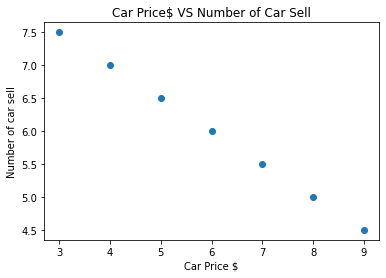

In [19]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3, 4, 5, 6, 7, 8, 9]
car_prices_np = np.array(car_prices_array, dtype=np.float32)
car_prices_np = car_prices_np.reshape(-1, 1)
car_prices_tensor = Variable(torch.from_numpy(car_prices_np))

# lets define number of car sell
number_of_car_sell_array = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np =  np.array(number_of_car_sell_array, dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1, 1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array, number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of car sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

- Now this plot is our collected data
- We have a question that is what will be number of car sell if the car price is 100$
- In order to solve this question we need to use linear regression.
- We need to line fit into this data. Aim is fitting line with minimum error.
- **Steps of Linear Regression**
    1. create LinearRegression class
    1. define model from this LinearRegression class
    1. MSE: Mean squared error
    1. Optimization (SGD:stochastic gradient descent)
    1. Backpropagation
    1. Prediction
- Lets implement it with Pytorch

epoch 0, loss 25.441530227661133
epoch 50, loss 4.986928462982178
epoch 100, loss 3.3698761463165283
epoch 150, loss 2.2771661281585693
epoch 200, loss 1.5387758016586304
epoch 250, loss 1.039815902709961
epoch 300, loss 0.7026475667953491
epoch 350, loss 0.47480812668800354
epoch 400, loss 0.3208477199077606
epoch 450, loss 0.21681061387062073
epoch 500, loss 0.14650797843933105
epoch 550, loss 0.09900152683258057
epoch 600, loss 0.06689989566802979
epoch 650, loss 0.04520672187209129
epoch 700, loss 0.030548106878995895
epoch 750, loss 0.020642811432480812
epoch 800, loss 0.01394933182746172
epoch 850, loss 0.00942629761993885
epoch 900, loss 0.006369795184582472
epoch 950, loss 0.004304381087422371
epoch 1000, loss 0.002908546943217516


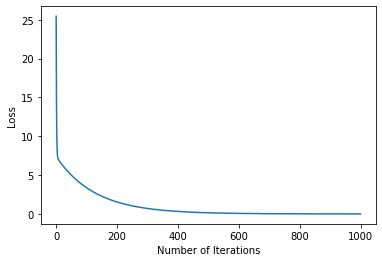

In [21]:
# Linear Regression with pytorch

# librairies
import torch
from torch.autograd import Variable
import torch.nn as nn 
import warnings
warnings.filterwarnings("ignore")


class LinearRegression(nn.Module):

    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)


# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)


# MSE
mse = nn.MSELoss()

# Optimization (find parameters that minimize error)
learning_rate = 0.02 # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):

    # optimization
    optimizer.zero_grad()

    # Forward to get output
    results = model(car_prices_tensor)

    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)

    # backward propagation
    loss.backward()

    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

- Number of iteration is 1001.
- Loss is almost zero that you can see from plot or loss in epoch number 1000.
- Now we have a trained model.
- While usign trained model, lets predict car prices.

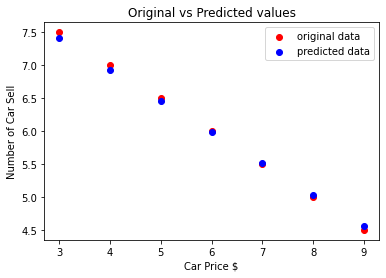

In [23]:
# predict our car price 
predicted = model(car_prices_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()